Jumlah baris data: 382
Jumlah kolom: 53
Daftar Kolom
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math',
       'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math',
       'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet',
       'romantic_math', 'famrel_math', 'freetime_math', 'goout_math',
       'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math',
       'G2_math', 'G3_math', 'guardian_por', 'traveltime_por', 'studytime_por',
       'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por',
       'activities_por', 'higher_por', 'romantic_por', 'famrel_por',
       'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por'],
      dtype='object')
Tipe data tiap kolom
 school             object
sex                object
age                 int64
address            object
famsize 

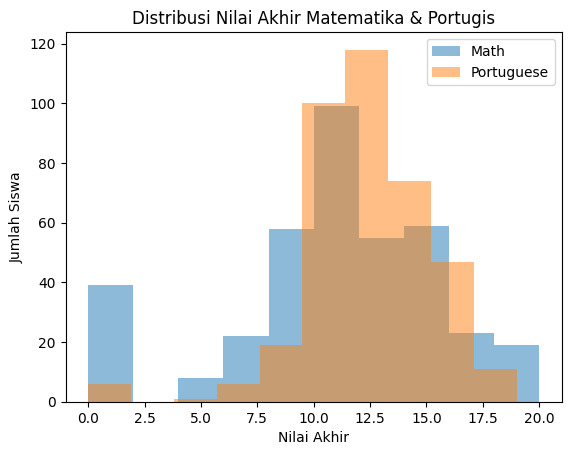

Koefisien: [0.52075709 0.02205333]
Intercept : 9.210888382028381
Mean Squared Error: 21.70185631840226
R^2 Score: 0.009622965842255082


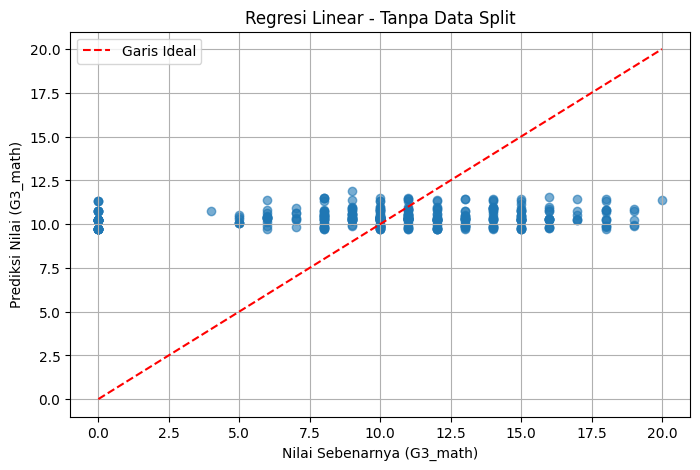

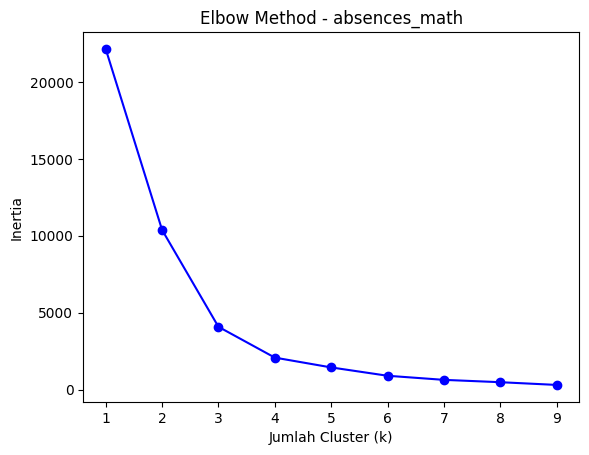

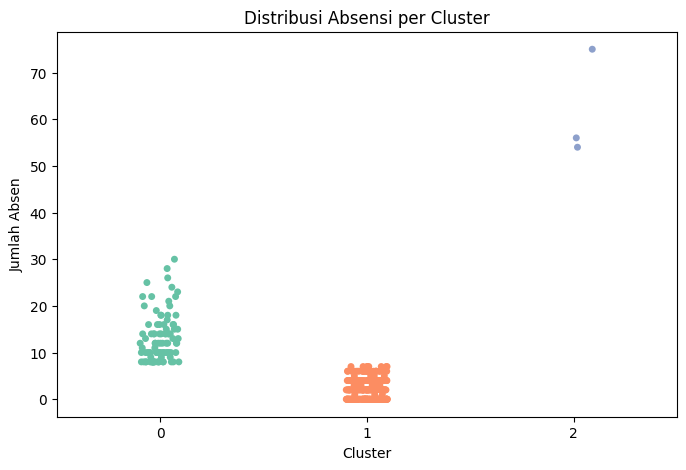

   studytime_math  failures_math  absences_math
0               2              0              6
1               2              0              4
2               2              3             10
3               3              0              2
4               2              0              4
Prediksi Lulus (1 = Ya, 0 = Tidak):
[1 1 0 1 1]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

d1 = pd.read_csv("student-mat.csv", sep=";")
d2 = pd.read_csv("student-por.csv", sep=";")

d3 = pd.merge(d1, d2, on=[
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
])
d3.columns = [col.replace('_x', '_math').replace('_y', '_por') for col in d3.columns]

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# ================== EDA START ================== 
# cek struktur data
print("Jumlah baris data:", d3.shape[0])
print("Jumlah kolom:", d3.shape[1])
print("Daftar Kolom\n", d3.columns)
print("Tipe data tiap kolom\n", d3.dtypes)

# cek contoh data
print(d3.head())

# cek missing values
print(d3.isnull().sum())

# ringkasan statistik numerik
print(d3.describe())

# visualisasi
plt.hist(d3['G3_math'], bins=10, alpha=0.5, label='Math')
plt.hist(d3['G3_por'], bins=10, alpha=0.5, label='Portuguese')
plt.xlabel("Nilai Akhir")
plt.ylabel("Jumlah Siswa")
plt.title("Distribusi Nilai Akhir Matematika & Portugis")
plt.legend()
plt.show()

# ================== EDA END ================== 


# ================== REGRESI LINEAR START ================== 
X = d3[['studytime_math', 'absences_math']]
y = d3['G3_math']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Koefisien:", model.coef_)
print("Intercept :", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R^2 Score:", r2_score(y, y_pred))

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([0, 20], [0, 20], 'r--', label='Garis Ideal')
plt.xlabel("Nilai Sebenarnya (G3_math)")
plt.ylabel("Prediksi Nilai (G3_math)")
plt.title("Regresi Linear - Tanpa Data Split")
plt.legend()
plt.grid(True)
plt.show()

# ================== REGRESI LINEAR END ================== 


# ================== CLUSTERING END ================== 
X_absen = d3[['absences_math']]

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_absen)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - absences_math')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
d3['Cluster_absen'] = kmeans.fit_predict(X_absen)

plt.figure(figsize=(8, 5))
sns.stripplot(data=d3, x='Cluster_absen', y='absences_math', hue='Cluster_absen', jitter=True, palette='Set2', legend=False)
plt.title('Distribusi Absensi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Absen')
plt.show()

# ================== CLUSTERING END ================== 


# ================== KLASIFIKASI START ================== 
d3['lulus_math'] = d3['G3_math'].apply(lambda x: 1 if x >= 10 else 0)

X = d3[['studytime_math', 'failures_math', 'absences_math']]
y = d3['lulus_math']

model = LogisticRegression()
model.fit(X, y)

print(X.head())
print("Prediksi Lulus (1 = Ya, 0 = Tidak):")
print(model.predict(X.head()))
# ================== KLASIFIKASI END ================== 